# Machine Learning - Predict billionaires' final worth

**Original Dataset Source: NIDULA ELGIRIYEWITHANA. (2023). Billionaires Statistics Dataset (2023). Kaggle. https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset/data.**

Raw data stored remotely on github without any modification from the original:

https://raw.githubusercontent.com/rui-min/MLProject_3401/main/data/Billionaires%20Statistics%20Dataset.csv

# Billionaires Statistics Dataset Description

**Attributes for 'Billionaires Statistics Dataset.csv'(as well as the original source data) dataset:**

Below attributes are copied **AS IS** from the original dataset.

1. rank: The ranking of the billionaire in terms of wealth.
2. finalWorth: The final net worth of the billionaire in U.S. dollars.
3. category: The category or industry in which the billionaire's business operates.
4. personName: The full name of the billionaire.
5. age: The age of the billionaire.
6. country: The country in which the billionaire resides.
7. city: The city in which the billionaire resides.
8. source: The source of the billionaire's wealth.
9. industries: The industries associated with the billionaire's business interests.
10. countryOfCitizenship: The country of citizenship of the billionaire.
11. organization: The name of the organization or company associated with the billionaire.
12. selfMade: Indicates whether the billionaire is self-made (True/False).
13. status: "D" represents self-made billionaires (Founders/Entrepreneurs) and "U" indicates inherited or unearned wealth.
14. gender: The gender of the billionaire.
15. birthDate: The birthdate of the billionaire.
16. lastName: The last name of the billionaire.
17. firstName: The first name of the billionaire.
18. title: The title or honorific of the billionaire.
19. date: The date of data collection.
20. state: The state in which the billionaire resides.
21. residenceStateRegion: The region or state of residence of the billionaire.
22. birthYear: The birth year of the billionaire.
23. birthMonth: The birth month of the billionaire.
24. birthDay: The birth day of the billionaire.
25. cpi_country: Consumer Price Index (CPI) for the billionaire's country.
26. cpi_change_country: CPI change for the billionaire's country.
27. gdp_country: Gross Domestic Product (GDP) for the billionaire's country.
28. gross_tertiary_education_enrollment: Enrollment in tertiary education in the billionaire's country.
29. gross_primary_education_enrollment_country: Enrollment in primary education in the billionaire's country.
30. life_expectancy_country: Life expectancy in the billionaire's country.
31. tax_revenue_country_country: Tax revenue in the billionaire's country.
32. total_tax_rate_country: Total tax rate in the billionaire's country.
33. population_country: Population of the billionaire's country.
34. latitude_country: Latitude coordinate of the billionaire's country.
35. longitude_country: Longitude coordinate of the billionaire's country.

**Note:** .csv data on github is exactly the same with data from original Kaggle website

# 1- Look at the big picture and frame the problem.

### Frame the problem
1. Supervised learning – training examples are labeled.
2. A regression task – predict the final worth of billionaires(in 2023).
3. Batch learning 
    - Small data set
    - No continuous flow of data coming into the system
    - No need to adjust to changing data rapidly

### Look at the big picture
Predictions will be used to help estimate wealth of billionaires. Researchers will use the prediction to write report and may publish on newspaper.

In [2]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2- Load the dataset remotely

Open the dataset using Pandas and load it into a DataFrame, which is the object Pandas uses to store tables of data.

In [3]:
# Load the dataset remotely, the data file is located on github URL

url = "https://raw.githubusercontent.com/rui-min/MLProject_3401/main/data/Billionaires%20Statistics%20Dataset.csv"

# use the pd.read_csv() function, including the first row of the CSV file - column headers.
billionaires = pd.read_csv(url, sep=',')

# Create a backup copy of the dataset
billionaires_backup = billionaires

## 2.1 Take a quick look at the data structure

Examine the number of rows, the number of columns, and columns labels in the dataset("finalWorth" is the target).

In [4]:
billionaires

rank  finalWorth               category                personName   age  \
0        1      211000       Fashion & Retail  Bernard Arnault & family  74.0   
1        2      180000             Automotive                 Elon Musk  51.0   
2        3      114000             Technology                Jeff Bezos  59.0   
3        4      107000             Technology             Larry Ellison  78.0   
4        5      106000  Finance & Investments            Warren Buffett  92.0   
...    ...         ...                    ...                       ...   ...   
2635  2540        1000             Healthcare                   Yu Rong  51.0   
2636  2540        1000        Food & Beverage    Richard Yuengling, Jr.  80.0   
2637  2540        1000          Manufacturing             Zhang Gongyun  60.0   
2638  2540        1000            Real Estate    Zhang Guiping & family  71.0   
2639  2540        1000            Diversified               Inigo Zobel  66.0   

            country        city                        source  \
0            France       Paris                          LVMH   
1     United States      Austin                 Tesla, SpaceX   
2     United States      Medina                        Amazon   
3     United States       Lanai                        Oracle   
4     United States       Omaha            Berkshire Hathaway   
...             ...         ...                           ...   
2635          China    Shanghai                Health clinics   
2636  United States  Pottsville                          Beer   
2637          China       Gaomi  Tyre manufacturing machinery   
2638          China     Nanjing                   Real estate   
2639    Philippines      Makati                   Diversified   

                 industries countryOfCitizenship  ... cpi_change_country  \
0          Fashion & Retail               France  ...                1.1   
1                Automotive        United States  ...                7.5   
2                Technology        United States  ...                7.5   
3                Technology        United States  ...                7.5   
4     Finance & Investments        United States  ...                7.5   
...                     ...                  ...  ...                ...   
2635             Healthcare                China  ...                2.9   
2636        Food & Beverage        United States  ...                7.5   
2637          Manufacturing                China  ...                2.9   
2638            Real Estate                China  ...                2.9   
2639            Diversified          Philippines  ...                2.5   

               gdp_country gross_tertiary_education_enrollment  \
0      $2,715,518,274,227                                 65.6   
1     $21,427,700,000,000                                 88.2   
2     $21,427,700,000,000                                 88.2   
3     $21,427,700,000,000                                 88.2   
4     $21,427,700,000,000                                 88.2   
...                    ...                                 ...   
2635  $19,910,000,000,000                                 50.6   
2636  $21,427,700,000,000                                 88.2   
2637  $19,910,000,000,000                                 50.6   
2638  $19,910,000,000,000                                 50.6   
2639     $376,795,508,680                                 35.5   

     gross_primary_education_enrollment_country life_expectancy_country  \
0                                         102.5                    82.5   
1                                         101.8                    78.5   
2                                         101.8                    78.5   
3                                         101.8                    78.5   
4                                         101.8                    78.5   
...                                         ...                     ...   
2635                 


#### Use head() to look at the first 5 rows

In [5]:
billionaires.head()

rank  finalWorth               category                personName   age  \
0     1      211000       Fashion & Retail  Bernard Arnault & family  74.0   
1     2      180000             Automotive                 Elon Musk  51.0   
2     3      114000             Technology                Jeff Bezos  59.0   
3     4      107000             Technology             Larry Ellison  78.0   
4     5      106000  Finance & Investments            Warren Buffett  92.0   

         country    city              source             industries  \
0         France   Paris                LVMH       Fashion & Retail   
1  United States  Austin       Tesla, SpaceX             Automotive   
2  United States  Medina              Amazon             Technology   
3  United States   Lanai              Oracle             Technology   
4  United States   Omaha  Berkshire Hathaway  Finance & Investments   

  countryOfCitizenship  ... cpi_change_country           gdp_country  \
0               France  ...                1.1   $2,715,518,274,227    
1        United States  ...                7.5  $21,427,700,000,000    
2        United States  ...                7.5  $21,427,700,000,000    
3        United States  ...                7.5  $21,427,700,000,000    
4        United States  ...                7.5  $21,427,700,000,000    

  gross_tertiary_education_enrollment  \
0                                65.6   
1                                88.2   
2                                88.2   
3                                88.2   
4                                88.2   

  gross_primary_education_enrollment_country life_expectancy_country  \
0                                      102.5                    82.5   
1                                      101.8                    78.5   
2                                      101.8                    78.5   
3                                      101.8                    78.5   
4                                      101.8                    78.5   

  tax_revenue_country_country total_tax_rate_country population_country  \
0                        24.2                   60.7         67059887.0   
1                         9.6                   36.6        328239523.0   
2                         9.6                   36.6        328239523.0   
3                         9.6                   36.6        328239523.0   
4                         9.6                   36.6        328239523.0   

  latitude_country longitude_country  
0        46.227638          2.213749  
1        37.090240        -95.712891  
2        37.090240        -95.712891  
3        37.090240        -95.712891  
4        37.090240        -95.712891  

[5 rows x 35 columns]

#### Use describe() method to see a summary of the numerical attributes.

In [6]:
billionaires.describe()

rank     finalWorth          age    birthYear   birthMonth  \
count  2640.000000    2640.000000  2575.000000  2564.000000  2564.000000   
mean   1289.159091    4623.787879    65.140194  1957.183307     5.740250   
std     739.693726    9834.240939    13.258098    13.282516     3.710085   
min       1.000000    1000.000000    18.000000  1921.000000     1.000000   
25%     659.000000    1500.000000    56.000000  1948.000000     2.000000   
50%    1312.000000    2300.000000    65.000000  1957.000000     6.000000   
75%    1905.000000    4200.000000    75.000000  1966.000000     9.000000   
max    2540.000000  211000.000000   101.000000  2004.000000    12.000000   

          birthDay  cpi_country  cpi_change_country  \
count  2564.000000  2456.000000         2456.000000   
mean     12.099844   127.755204            4.364169   
std       9.918876    26.452951            3.623763   
min       1.000000    99.550000           -1.900000   
25%       1.000000   117.240000            1.700000   
50%      11.000000   117.240000            2.900000   
75%      21.000000   125.080000            7.500000   
max      31.000000   288.570000           53.500000   

       gross_tertiary_education_enrollment  \
count                          2458.000000   
mean                             67.225671   
std                              21.343426   
min                               4.000000   
25%                              50.600000   
50%                              65.600000   
75%                              88.200000   
max                             136.600000   

       gross_primary_education_enrollment_country  life_expectancy_country  \
count                                 2459.000000              2458.000000   
mean                                   102.858520                78.122823   
std                                      4.710977                 3.730099   
min                                     84.700000                54.300000   
25%                                    100.200000                77.000000   
50%                                    101.800000                78.500000   
75%                                    102.600000                80.900000   
max                                    142.100000                84.200000   

       tax_revenue_country_country  total_tax_rate_country  \
count                  2457.000000             2458.000000   
mean                     12.546235               43.963344   
std                       5.368625               12.145296   
min                       0.100000                9.900000   
25%                       9.600000               36.600000   
50%                       9.600000               41.200000   
75%                      12.800000               59.100000   
max                      37.200000              106.300000   

       population_country  latitude_country  longitude_country  
count        2.476000e+03       2476.000000        2476.000000  
mean         5.102053e+08         34.903592          12.583156  
std          5.542447e+08         17.003497          86.762989  
min          3.801900e+04        -40.900557        -106.346771  
25%          6.683440e+07         35.861660         -95.712891  
50%          3.282395e+08         37.090240          10.451526  
75%          1.366418e+09         40.463667         104.195397  
max          1.397715e+09         61.924110         174.885971

#### Use info() to get a quick description of the data, the total number of rows, each attribute’s type, and the number of non-null values.

In [7]:
billionaires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

#### For categorical data, use value_counts to show what categories exist and how many rows belong to each category(make 2 examples below)

In [8]:
billionaires["birthDate"].value_counts()

birthDate
1/1/1965 0:00     19
1/1/1962 0:00     16
1/1/1966 0:00     15
1/1/1967 0:00     15
1/1/1971 0:00     15
                  ..
5/6/2004 0:00      1
2/26/1957 0:00     1
9/14/1946 0:00     1
5/5/1935 0:00      1
11/1/1956 0:00     1
Name: count, Length: 2060, dtype: int64

In [9]:
billionaires["date"].value_counts()

date
4/4/2023 5:01    2638
4/4/2023 9:01       2
Name: count, dtype: int64

## 2.2 Clean dataset before creating test set

We will do data cleaning and preprocessing on the whole dataset, then split it into training and testing datasets right before training the model in section 4.

# 3. Explore and visualize the data to gain insights.


### 3.1 Plot a histogram of the data using hist()

The towers or bars of a histogram are called bins. The height of each bin shows how many values from that data fall into that range. 

Width of each bin is = (max value of data – min value of data) / total number of bins
    - age bin width = (22-15)/20 = 0.35

The default value of the number of bins to be created in a histogram is 10. However, we can change the size of bins using the parameter bins

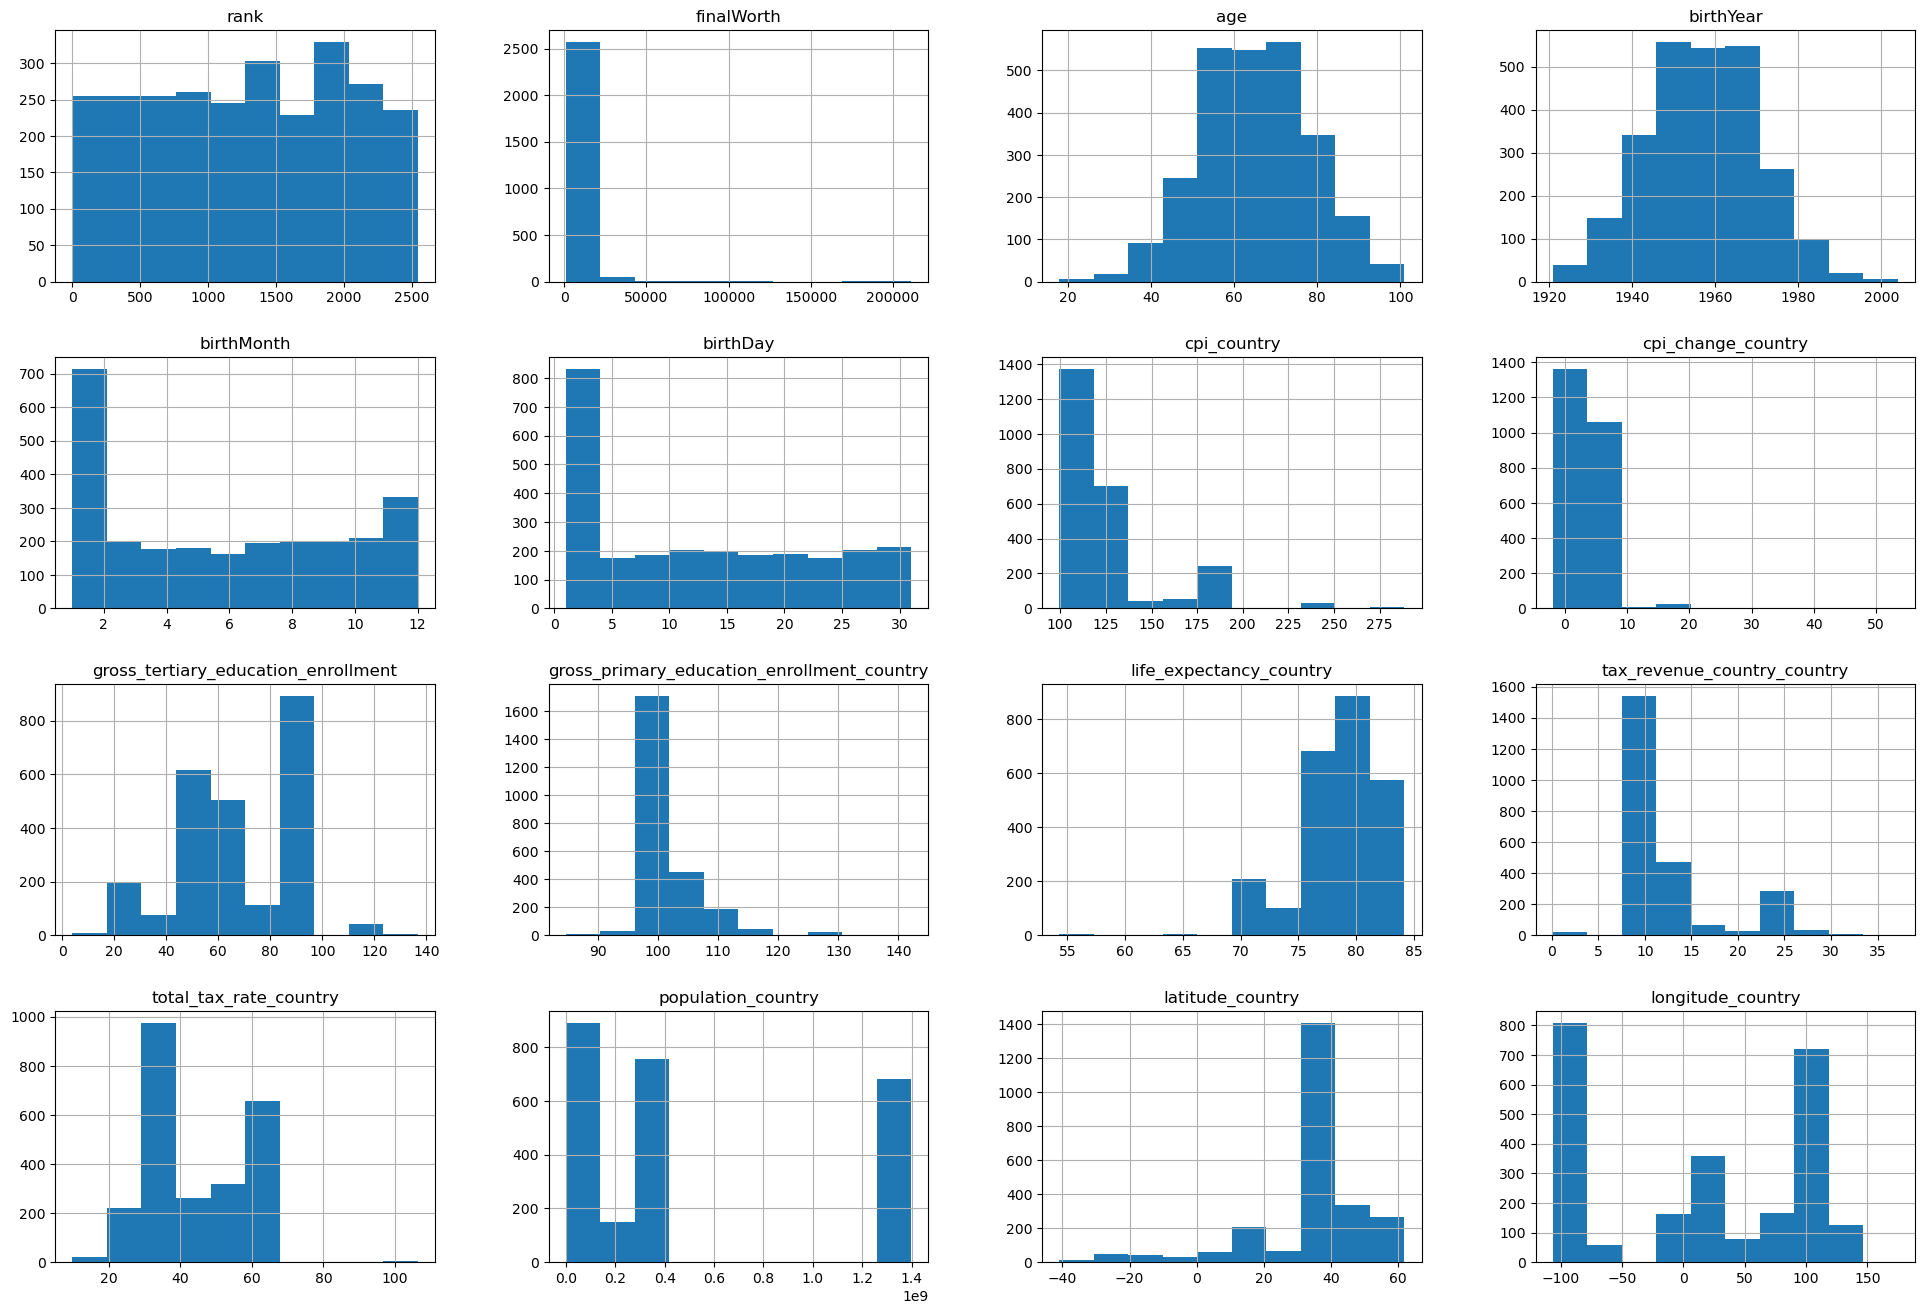

In [10]:
billionaires.hist(figsize=(24, 16))
plt.show()

#### Note that these attributes have very different scales. We will scale these attributes later.

## 3.2 Look for correlations between the features

### 3.2.1 Look for correlation between all attributes

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
d:\Program_Files2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


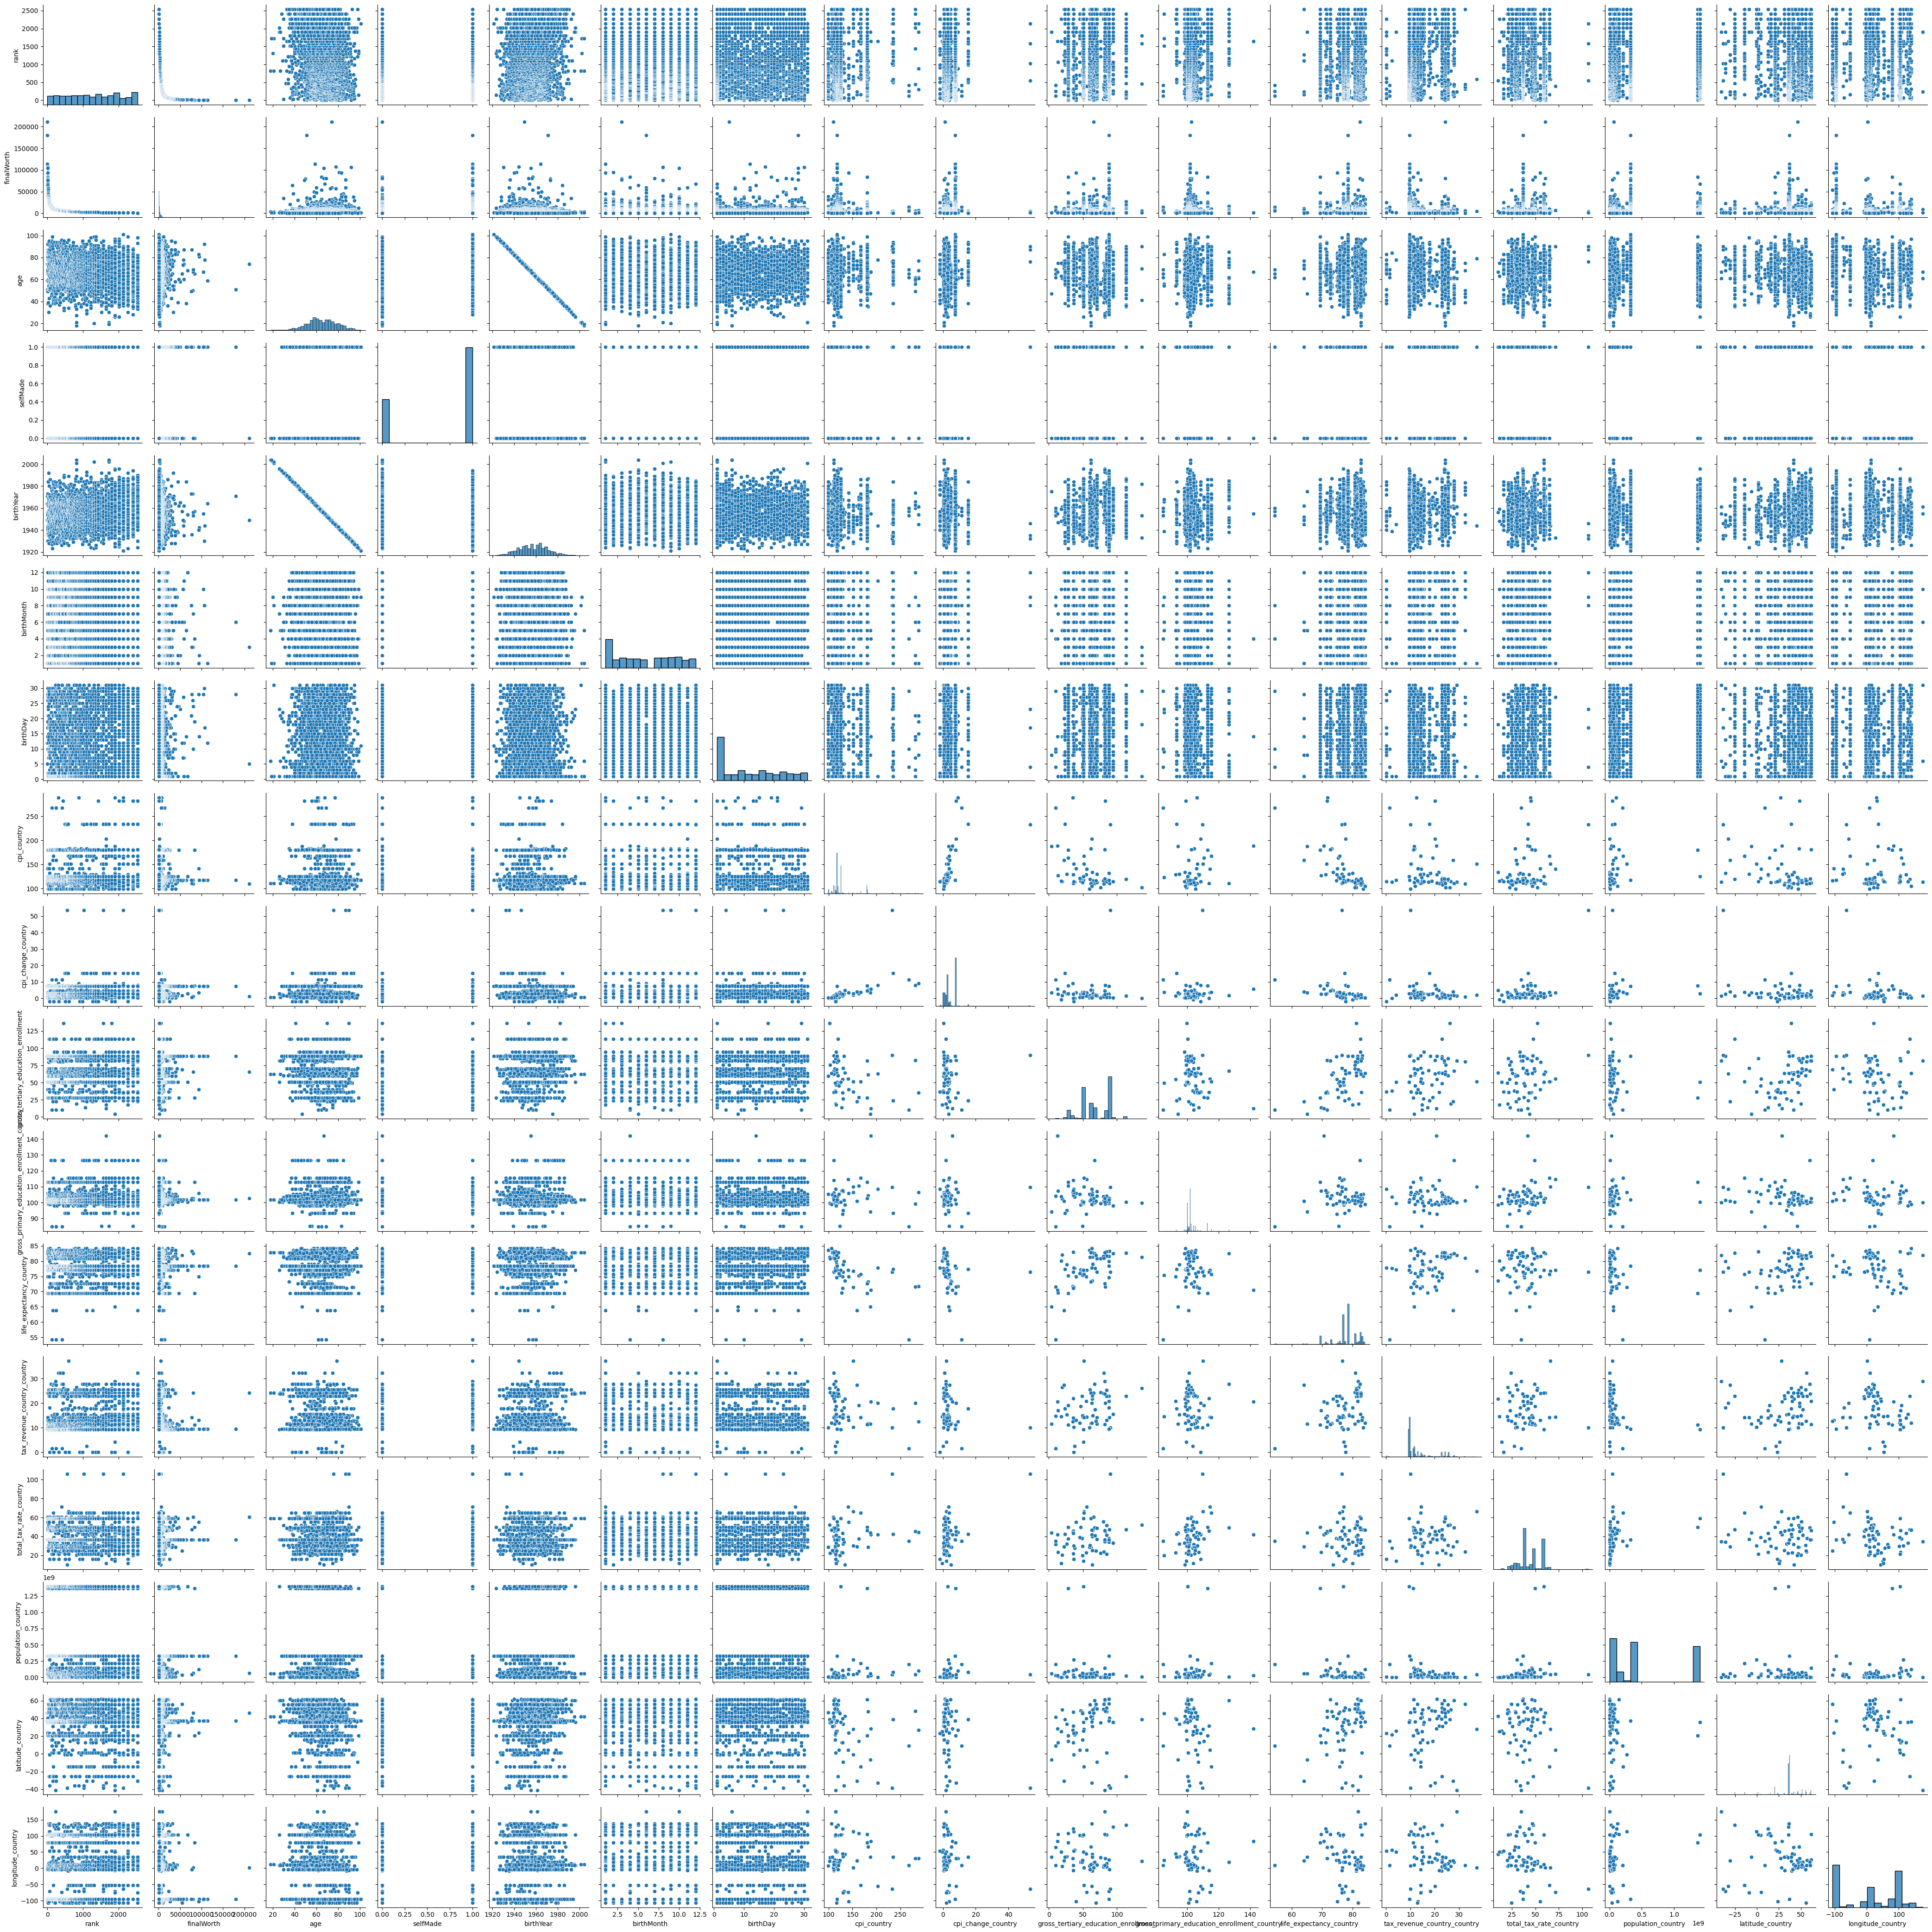

In [11]:
# Check for correlation between attributes using sns.pairplot.
sns.pairplot(billionaires)

### 3.2.2 Look for correlations(numeric attributes only) using Pearson correlation coefficient.

In [12]:
#corr method has pearson standard correlation coefficient as the default 

corr_matrix = billionaires.corr(numeric_only=True)
corr_matrix

rank  finalWorth       age  \
rank                                        1.000000   -0.448930 -0.142686   
finalWorth                                 -0.448930    1.000000  0.067053   
age                                        -0.142686    0.067053  1.000000   
selfMade                                    0.063669   -0.023831 -0.050538   
birthYear                                   0.143708   -0.066721 -0.999336   
birthMonth                                 -0.042514    0.003407  0.015322   
birthDay                                   -0.042987    0.059315  0.081547   
cpi_country                                 0.074872   -0.042842 -0.001479   
cpi_change_country                         -0.069537    0.035702  0.115669   
gross_tertiary_education_enrollment        -0.126277    0.066711  0.061736   
gross_primary_education_enrollment_country  0.005887   -0.008880  0.066394   
life_expectancy_country                    -0.041443    0.021819  0.020327   
tax_revenue_country_country                 0.021576   -0.009270  0.006429   
total_tax_rate_country                      0.123434   -0.036381 -0.151771   
population_country                          0.118411   -0.053024 -0.167812   
latitude_country                           -0.060056    0.031122 -0.122544   
longitude_country                           0.185638   -0.101048 -0.169338   

                                            selfMade  birthYear  birthMonth  \
rank                                        0.063669   0.143708   -0.042514   
finalWorth                                 -0.023831  -0.066721    0.003407   
age                                        -0.050538  -0.999336    0.015322   
selfMade                                    1.000000   0.050333    0.001391   
birthYear                                   0.050333   1.000000   -0.045066   
birthMonth                                  0.001391  -0.045066    1.000000   
birthDay                                   -0.030345  -0.091512    0.221384   
cpi_country                                -0.015086  -0.000738    0.056870   
cpi_change_country                          0.031552  -0.118060    0.106427   
gross_tertiary_education_enrollment         0.012241  -0.061316    0.049269   
gross_primary_education_enrollment_country -0.224357  -0.066810    0.026174   
life_expectancy_country                    -0.052792  -0.017936   -0.044165   
tax_revenue_country_country                -0.156087  -0.005262    0.001484   
total_tax_rate_country                      0.111429   0.151297   -0.046784   
population_country                          0.221644   0.167355   -0.050506   
latitude_country                            0.070572   0.125035   -0.038060   
longitude_country                           0.106552   0.169756   -0.062697   

                                            birthDay  cpi_country  \
rank                                       -0.042987     0.074872   
finalWorth                                  0.059315    -0.042842   
age                                         0.081547    -0.001479   
selfMade                                   -0.030345    -0.015086   
birthYear                                  -0.091512    -0.000738   
birthMonth                                  0.221384     0.056870   
birthDay                                    1.000000     0.037517   
cpi_country                                 0.037517     1.000000   
cpi_change_country                          0.146357     0.436769   
gross_tertiary_education_enrollment         0.171608    -0.456428   
gross_primary_education_enrollment_country  0.045075     0.279601   
life_expectancy_country                     0.004498    -0.747716   
tax_revenue_country_country                 0.034128    -0.037022   
total_tax_rate_country                     -0.149580     0.245961   
population_country                         -0.204271     0.218303   
latitude_country                            0.006617    -0.215101   
longitude_country                          -0.1

#### Let's look at correlations with regard to our target(numerical attributes only)

In [13]:
corr_matrix["finalWorth"].sort_values(ascending=False)

finalWorth                                    1.000000
age                                           0.067053
gross_tertiary_education_enrollment           0.066711
birthDay                                      0.059315
cpi_change_country                            0.035702
latitude_country                              0.031122
life_expectancy_country                       0.021819
birthMonth                                    0.003407
gross_primary_education_enrollment_country   -0.008880
tax_revenue_country_country                  -0.009270
selfMade                                     -0.023831
total_tax_rate_country                       -0.036381
cpi_country                                  -0.042842
population_country                           -0.053024
birthYear                                    -0.066721
longitude_country                            -0.101048
rank                                         -0.448930
Name: finalWorth, dtype: float64

#### Finding from above: 'age' and 'birthYear' are almost the same attribute in two forms. The above correlation proves this. age=0.067 and birthYear=-0.0667(slight difference due to birthMonth and birthDay)

### 3.2.3 Create three scatterplot by the top three correlated attributes vs. finalWorth

Text(0, 0.5, 'finalWorth')

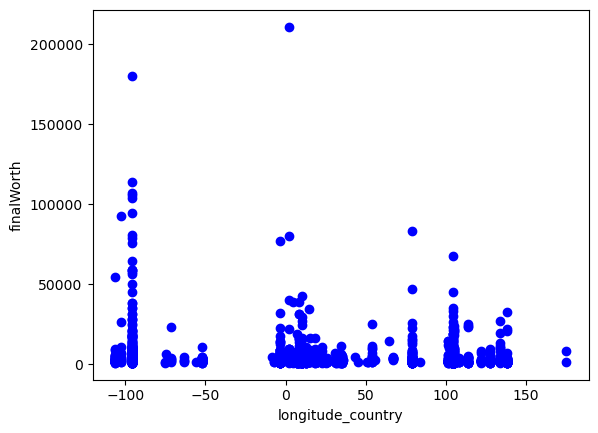

In [14]:
# Create a scatterplot of longitude_country vs. finalWorth

X = billionaires["longitude_country"]
y = billionaires["finalWorth"]
# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, color = 'b')
plt.xlabel("longitude_country")
plt.ylabel("finalWorth")

Text(0, 0.5, 'finalWorth')

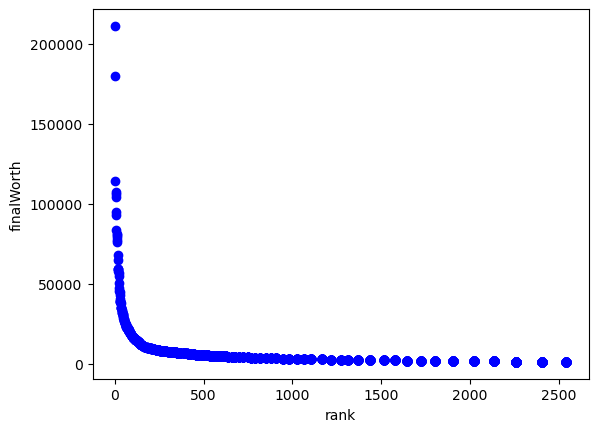

In [15]:
# Create a scatterplot of rank vs. finalWorth

X = billionaires["rank"]
y = billionaires["finalWorth"]
# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, color = 'b')
plt.xlabel("rank")
plt.ylabel("finalWorth")

Text(0, 0.5, 'finalWorth')

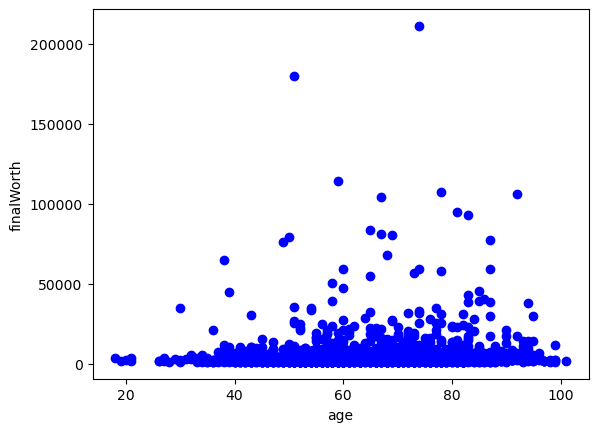

In [16]:
# Create a scatterplot of age vs. finalWorth

X = billionaires["age"]
y = billionaires["finalWorth"]
# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, color = 'b')
plt.xlabel("age")
plt.ylabel("finalWorth")

#### Finding from above: there are outliers due to super high final worth(>10000 on first impression). It can make linear regression inaccurate and cause overfitting for high degree polynomial regression. We will remove the rows(some of the top billionaires) in next section through z-score technique.

# 4. Prepare the data for Machine Learning Algorithms(clean and use pipeline)

In [115]:
# restore original dataset for section 4
billionaires = billionaires_backup

#### Let's start by cleaning up the data: Remove duplicates; Remove meaningless attributes(columns); Handle missing values; Remove outliers.

### 4.1 Check for duplicate rows and remove them if any.

In [116]:
# Check for duplicate rows

billionaires.duplicated().sum()

0

#### No duplicates so no need to remove rows for duplication purpose.

### 4.2 Remove meaningless features(columns)

* 'category' and 'industries' are exactly the same features in the dataset. We will remove 'category' and use 'industries' only.

* 'personName', 'firstName', 'lastName' are unique to most billionaires. They are not logically related to 'finalWorth'. Remove them to reduce unnecessary complexity.

* As we discussed in 3.2.2, 'age' is enough for representing birth information. We will remove 'birthDate', 'birthYear', 'birthMonth', 'birthDay' to reduce unnecessary complexity.

* 'source' is the company name. it's nearly always unique to each billionaire and not logically related to 'finalWorth'. Remove them to reduce unnecessary complexity.

* 'status' and 'selfMade' are similar attributes. 'status' has some unknown categories such as 'N'(not mentioned in original data website).'selfMade' clearly distinguishes whether the wealth is self-made or not. We will remove 'status'.

* 'date' is the date of data collection, which is irrelevant to our analysis.

In total, 11 features will be removed.

In [117]:
billionaires = billionaires.drop(labels=['category', 'personName', 'firstName', 'lastName', 'birthDate', 'birthYear',
                           'birthMonth', 'birthDay', 'source', 'status', 'date'], axis=1)

# Now 24 columns left (originally 35)
billionaires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   age                                         2575 non-null   float64
 3   country                                     2602 non-null   object 
 4   city                                        2568 non-null   object 
 5   industries                                  2640 non-null   object 
 6   countryOfCitizenship                        2640 non-null   object 
 7   organization                                325 non-null    object 
 8   selfMade                                    2640 non-null   bool   
 9   gender                                      2640 non-null   object 
 10  title       

Now 24 columns left (originally 35)

### 4.3 Handle the missing values

#### 4.3.1 No '?' values

In [118]:
# Find if there is any ? values
(billionaires.values== '?').sum()

0

#### 4.3.2 A lot of null values

In [119]:
# Find the number of missing values in each column

billionaires.isna().sum()

rank                                             0
finalWorth                                       0
age                                             65
country                                         38
city                                            72
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
gender                                           0
title                                         2301
state                                         1887
residenceStateRegion                          1893
cpi_country                                    184
cpi_change_country                             184
gdp_country                                    164
gross_tertiary_education_enrollment            182
gross_primary_education_enrollment_country     181
life_expectancy_country                        182
tax_revenue_country_country    

#### 4.3.3 We will remove features that have >264 rows missing(10% of total rows).
    
So 'organization', 'title', 'state', 'residenceStateRegion' are removed, 20 columns are left.

In [120]:
billionaires = billionaires.drop(labels=['organization', 'title', 'state', 'residenceStateRegion'], axis=1)

# Now 20 columns left
billionaires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   age                                         2575 non-null   float64
 3   country                                     2602 non-null   object 
 4   city                                        2568 non-null   object 
 5   industries                                  2640 non-null   object 
 6   countryOfCitizenship                        2640 non-null   object 
 7   selfMade                                    2640 non-null   bool   
 8   gender                                      2640 non-null   object 
 9   cpi_country                                 2456 non-null   float64
 10  cpi_change_c

#### 4.3.4 Deal with missing values' rows

In [121]:
billionaires.isna().sum()

rank                                            0
finalWorth                                      0
age                                            65
country                                        38
city                                           72
industries                                      0
countryOfCitizenship                            0
selfMade                                        0
gender                                          0
cpi_country                                   184
cpi_change_country                            184
gdp_country                                   164
gross_tertiary_education_enrollment           182
gross_primary_education_enrollment_country    181
life_expectancy_country                       182
tax_revenue_country_country                   183
total_tax_rate_country                        182
population_country                            164
latitude_country                              164
longitude_country                             164


#### For the cpi_country attribute we will delete the missing values' rows

In [122]:
billionaires.dropna(subset=["cpi_country"], inplace=True)

From 2640 rows to 2456 rows(184 removed)

In [123]:
billionaires

rank  finalWorth   age        country        city  \
0        1      211000  74.0         France       Paris   
1        2      180000  51.0  United States      Austin   
2        3      114000  59.0  United States      Medina   
3        4      107000  78.0  United States       Lanai   
4        5      106000  92.0  United States       Omaha   
...    ...         ...   ...            ...         ...   
2635  2540        1000  51.0          China    Shanghai   
2636  2540        1000  80.0  United States  Pottsville   
2637  2540        1000  60.0          China       Gaomi   
2638  2540        1000  71.0          China     Nanjing   
2639  2540        1000  66.0    Philippines      Makati   

                 industries countryOfCitizenship  selfMade gender  \
0          Fashion & Retail               France     False      M   
1                Automotive        United States      True      M   
2                Technology        United States      True      M   
3                Technology        United States      True      M   
4     Finance & Investments        United States      True      M   
...                     ...                  ...       ...    ...   
2635             Healthcare                China      True      M   
2636        Food & Beverage        United States     False      M   
2637          Manufacturing                China      True      M   
2638            Real Estate                China      True      M   
2639            Diversified          Philippines     False      M   

      cpi_country  cpi_change_country           gdp_country  \
0          110.05                 1.1   $2,715,518,274,227    
1          117.24                 7.5  $21,427,700,000,000    
2          117.24                 7.5  $21,427,700,000,000    
3          117.24                 7.5  $21,427,700,000,000    
4          117.24                 7.5  $21,427,700,000,000    
...           ...                 ...                   ...   
2635       125.08                 2.9  $19,910,000,000,000    
2636       117.24                 7.5  $21,427,700,000,000    
2637       125.08                 2.9  $19,910,000,000,000    
2638       125.08                 2.9  $19,910,000,000,000    
2639       129.61                 2.5     $376,795,508,680    

      gross_tertiary_education_enrollment  \
0                                    65.6   
1                                    88.2   
2                                    88.2   
3                                    88.2   
4                                    88.2   
...                                   ...   
2635                                 50.6   
2636                                 88.2   
2637                                 50.6   
2638                                 50.6   
2639                                 35.5   

      gross_primary_education_enrollment_country  life_expectancy_country  \
0                                          102.5                     82.5   
1                                          101.8                     78.5   
2                                          101.8                     78.5   
3                                          101.8                     78.5   
4                                          101.8                     78.5   
...                                          ...                      ...   
2635                                       100.2                     77.0   
2636                                       101.8                     78.5   
2637                                       100.2                     77.0   
2638                                       100.2                     77.0   
2639                                       107.5                     71.1   

      tax_revenue_country_country  total_tax_rate_country  population_country  \
0                            24.2                    60.7        6.705989e+07   
1                             9.6                    36.6        3.282395e+08   
2 

In [124]:
billionaires.isna().sum()

rank                                           0
finalWorth                                     0
age                                           49
country                                        0
city                                          26
industries                                     0
countryOfCitizenship                           0
selfMade                                       0
gender                                         0
cpi_country                                    0
cpi_change_country                             0
gdp_country                                    0
gross_tertiary_education_enrollment            0
gross_primary_education_enrollment_country     0
life_expectancy_country                        0
tax_revenue_country_country                    0
total_tax_rate_country                         0
population_country                             0
latitude_country                               0
longitude_country                              0
dtype: int64

#### For the remaining missing values, we will fill them with the mean if it is a numerical value and the most frequent if it is a categorical column

#### We will do this through creating a pipeline, that will also scale the features and perform encoding in step 4.5.




### 4.4 Remove outliers with z-score

Following discussion in 3.2.3, we want to remove outliers. First we check the deviations from column mean using z-score(numerical attributes only).

In [125]:
# code adapted from online author Manuel. see https://stackoverflow.com/questions/24761998/pandas-compute-z-score-for-all-columns

from scipy.stats import zscore
# Note that `select_dtypes` returns a data frame. We are selecting only the columns
numeric_cols = billionaires.select_dtypes(include=[np.number]).columns
zscoreData = billionaires[numeric_cols].apply(zscore)

# find z-score>=threshold (results are all in the head part of data continuously)
zscoreData.loc[zscoreData['finalWorth'] >= 0.5]

rank  finalWorth  age  cpi_country  cpi_change_country  \
0   -1.733211   20.389434  NaN    -0.669446           -0.900951   
1   -1.731862   17.325591  NaN    -0.397587            0.865528   
2   -1.730512   10.802572  NaN    -0.397587            0.865528   
3   -1.729163   10.110736  NaN    -0.397587            0.865528   
4   -1.727814   10.011903  NaN    -0.397587            0.865528   
..        ...         ...  ...          ...                 ...   
184 -1.486272    0.504108  NaN    -1.066457           -1.094160   
185 -1.486272    0.504108  NaN    -0.669446           -0.900951   
186 -1.486272    0.504108  NaN    -0.669446           -0.900951   
187 -1.486272    0.504108  NaN    -0.669446           -0.900951   
188 -1.486272    0.504108  NaN    -0.652053           -0.707743   

     gross_tertiary_education_enrollment  \
0                              -0.077993   
1                               0.982689   
2                               0.982689   
3                               0.982689   
4                               0.982689   
..                                   ...   
184                            -0.359590   
185                            -0.077993   
186                            -0.077993   
187                            -0.077993   
188                            -0.012287   

     gross_primary_education_enrollment_country  life_expectancy_country  \
0                                     -0.075503                 1.174196   
1                                     -0.224056                 0.101015   
2                                     -0.224056                 0.101015   
3                                     -0.224056                 0.101015   
4                                     -0.224056                 0.101015   
..                                          ...                      ...   
184                                    0.497486                 1.469321   
185                                   -0.075503                 1.174196   
186                                   -0.075503                 1.174196   
187                                   -0.075503                 1.174196   
188                                    5.038958                 1.174196   

     tax_revenue_country_country  total_tax_rate_country  population_country  \
0                       2.170966                1.377834           -0.806687   
1                      -0.548636               -0.607860           -0.335646   
2                      -0.548636               -0.607860           -0.335646   
3                      -0.548636               -0.607860           -0.335646   
4                      -0.548636               -0.607860           -0.335646   
..                           ...                     ...                 ...   
184                    -0.455499               -1.250533           -0.912165   
185                     2.170966                1.377834           -0.806687   
186                     2.170966                1.377834           -0.806687   
187                     2.170966                1.377834           -0.806687   
188                     2.860180                0.422064           -0.909080   

     latitude_country  longitude_country  
0            0.668375          -0.119298  
1            0.132463          -1.243725  
2            0.132463          -1.243725  
3            0.132463          -1.243725  
4            0.132463          -1.243725  
..                ...                ...  
184          0.703011          -0.050246  
185          0.668375          -0.119298  
186          0.668375          -0.119298  
187          0.668375          -0.119298  
188          1.483647           0.069354  

[178 rows x 13 columns]

In [126]:
# find z-score<=-threshold (0 result)
zscoreData.loc[zscoreData['finalWorth'] <= -0.5]

Empty DataFrame
Columns: [rank, finalWorth, age, cpi_country, cpi_change_country, gross_tertiary_education_enrollment, gross_primary_education_enrollment_country, life_expectancy_country, tax_revenue_country_country, total_tax_rate_country, population_country, latitude_country, longitude_country]
Index: []

For simplicity, z-score outside (-threshold, threshold) range will be removed. From above detection we see rows with ranking<=189 will be removed. In the dataset, the top billionaires with finalWorth>=9800 are removed.

In [127]:
billionaires = billionaires.loc[billionaires['rank'] > 189]
billionaires

rank  finalWorth   age        country         city  \
189    190        9700  63.0         Russia       Moscow   
190    190        9700  59.0    South Korea        Seoul   
191    190        9700  53.0          China      Beijing   
192    190        9700  76.0        Germany       Haiger   
193    190        9700  64.0          China  Lianyungang   
...    ...         ...   ...            ...          ...   
2635  2540        1000  51.0          China     Shanghai   
2636  2540        1000  80.0  United States   Pottsville   
2637  2540        1000  60.0          China        Gaomi   
2638  2540        1000  71.0          China      Nanjing   
2639  2540        1000  66.0    Philippines       Makati   

                 industries countryOfCitizenship  selfMade gender  \
189           Manufacturing               Russia      True      M   
190   Finance & Investments        United States      True      M   
191              Technology                China      True      M   
192           Manufacturing              Germany     False      M   
193              Healthcare                China      True      M   
...                     ...                  ...       ...    ...   
2635             Healthcare                China      True      M   
2636        Food & Beverage        United States     False      M   
2637          Manufacturing                China      True      M   
2638            Real Estate                China      True      M   
2639            Diversified          Philippines     False      M   

      cpi_country  cpi_change_country           gdp_country  \
189        180.75                 4.5   $1,699,876,578,871    
190        115.16                 0.4   $2,029,000,000,000    
191        125.08                 2.9  $19,910,000,000,000    
192        112.85                 1.4   $3,845,630,030,824    
193        125.08                 2.9  $19,910,000,000,000    
...           ...                 ...                   ...   
2635       125.08                 2.9  $19,910,000,000,000    
2636       117.24                 7.5  $21,427,700,000,000    
2637       125.08                 2.9  $19,910,000,000,000    
2638       125.08                 2.9  $19,910,000,000,000    
2639       129.61                 2.5     $376,795,508,680    

      gross_tertiary_education_enrollment  \
189                                  81.9   
190                                  94.3   
191                                  50.6   
192                                  70.2   
193                                  50.6   
...                                   ...   
2635                                 50.6   
2636                                 88.2   
2637                                 50.6   
2638                                 50.6   
2639                                 35.5   

      gross_primary_education_enrollment_country  life_expectancy_country  \
189                                        102.6                     72.7   
190                                         98.1                     82.6   
191                                        100.2                     77.0   
192                                        104.0                     80.9   
193                                        100.2                     77.0   
...                                          ...                      ...   
2635                                       100.2                     77.0   
2636                                       101.8                     78.5   
2637                                       100.2                     77.0   
2638                                       100.2                     77.0   
2639                                       107.5                     71.1   

      tax_revenue_country_country  total_tax_rate_country  population_country  \
189                          11.4                    46.2        1.443735e+08   
190                          15.6                    33.2        5.1709

Calculate the % of rows identified as outlier:

In [128]:
# calculate the % of rows identified as outlier
print(f'% of rows identified as outliers: {189/len(billionaires_backup.index)*100:.2f}%')

% of rows identified as outliers: 7.16%


The final revised data is 2278 rows X 20 columnns, originally it's 2640 rows × 35 columns(see section 2.1).

Calculate the % of rows removed:

In [129]:
# calculate the % of rows identified as outlier
rows_original = len(billionaires_backup.index)
print(f'number of original rows: {rows_original}')
print(f'% of rows removed: {(rows_original-2278)/rows_original*100:.2f}%')

number of original rows: 2640
% of rows removed: 13.71%


In [130]:
# backup the revised data for convenience
revised_backup = billionaires

### 4.5 Create a pipeline that will:

1. Fill in the missing numerical values with the mean using a SimpleImputer

2. Scale the numerical columns using StandardScaler. Do not scale the target

3. Fill in the missing categorical values with the most_frequent value using SimpleImputer

4. Encode the categorical columns using OneHotEncoder


In [131]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [132]:
# initialize billionaires to revised data(used for section 4.5 only)
billionaires = revised_backup

In [133]:
# PolynomialFeatures code in the line num_pipeline=... is adapted from online author Flavia G., see
# https://stackoverflow.com/questions/72931145/how-to-apply-polynomialfeatures-only-to-certain-not-all-independent-variables

# Create the cat and num columns
# Get a list of column names from the 'billionaires' DataFrame that are of numerical data types.
# Get a list of column names from the 'billionaires' DataFrame that are not of numerical data types.

num_cols = billionaires.select_dtypes(include='number').columns.to_list()
cat_cols = billionaires.select_dtypes(exclude='number').columns.to_list()


# Exclude the target from numerical columns
num_cols.remove("finalWorth")

# Create pipelines for numeric and categorical columns, fill in missing cell with mean/most frequent value
# include bias=False means don't force y-intercept to equal zero
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler(), PolynomialFeatures(degree=4, include_bias=False))
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse_output=False))

# Use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

In [134]:
# 12 numerical features(target excluded)
num_cols

['rank',
 'age',
 'cpi_country',
 'cpi_change_country',
 'gross_tertiary_education_enrollment',
 'gross_primary_education_enrollment_country',
 'life_expectancy_country',
 'tax_revenue_country_country',
 'total_tax_rate_country',
 'population_country',
 'latitude_country',
 'longitude_country']

In [135]:
# 7 categorial features(target excluded)
cat_cols

['country',
 'city',
 'industries',
 'countryOfCitizenship',
 'selfMade',
 'gender',
 'gdp_country']

#### Display your pipeline

In [136]:
# Show the pipeline
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler()),
                                                 ('polynomialfeatures',
                                                  PolynomialFeatures(degree=4,
                                                                     include_bias=False))]),
                                 ['rank', 'age', 'cpi_country',
                                  'cpi_change_country',
                                  'gross_tertiary_education_enrollment',
                                  'gross_primary_education_enrollment_count...
                                  'life_expectancy_country',
                                  'tax_revenue_country_country',
                                  'total_tax_rate_country',
                                  'population_country', 'latitude_country',
                                  'longitude_country']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['country', 'city', 'industries',
                                  'countryOfCitizenship', 'selfMade', 'gender',
                                  'gdp_country'])])

In [137]:
# Apply the preprocessing pipeline on the dataset
billionaires_prepared = preprocessing.fit_transform(billionaires)

# Scikit-learn strips the column headers, so just add them back on afterward.
feature_names=preprocessing.get_feature_names_out()
billionaires_prepared = pd.DataFrame(data=billionaires_prepared, columns=feature_names)

billionaires_prepared.shape

(2278, 2728)

In [138]:
billionaires_prepared

num__rank  num__age  num__cpi_country  num__cpi_change_country  \
0     -1.729665 -0.130861          1.978645                 0.036087   
1     -1.729665 -0.440566         -0.479353                -1.081798   
2     -1.729665 -0.905123         -0.107599                -0.400161   
3     -1.729665  0.875680         -0.565920                -0.809143   
4     -1.729665 -0.053434         -0.107599                -0.400161   
...         ...       ...               ...                      ...   
2273   1.690188 -1.059975         -0.107599                -0.400161   
2274   1.690188  1.185385         -0.401404                 0.854051   
2275   1.690188 -0.363139         -0.107599                -0.400161   
2276   1.690188  0.488549         -0.107599                -0.400161   
2277   1.690188  0.101418          0.062164                -0.509223   

      num__gross_tertiary_education_enrollment  \
0                                     0.696995   
1                                     1.279585   
2                                    -0.773575   
3                                     0.147293   
4                                    -0.773575   
...                                        ...   
2273                                 -0.773575   
2274                                  0.992989   
2275                                 -0.773575   
2276                                 -0.773575   
2277                                 -1.483019   

      num__gross_primary_education_enrollment_country  \
0                                           -0.053581   
1                                           -1.001724   
2                                           -0.559257   
3                                            0.241397   
4                                           -0.559257   
...                                               ...   
2273                                        -0.559257   
2274                                        -0.222140   
2275                                        -0.559257   
2276                                        -0.559257   
2277                                         0.978842   

      num__life_expectancy_country  num__tax_revenue_country_country  \
0                        -1.462990                         -0.218340   
1                         1.209621                          0.567792   
2                        -0.302159                         -0.592688   
3                         0.750687                         -0.199622   
4                        -0.302159                         -0.592688   
...                            ...                               ...   
2273                     -0.302159                         -0.592688   
2274                      0.102782                         -0.555253   
2275                     -0.302159                         -0.592688   
2276                     -0.302159                         -0.592688   
2277                     -1.894927                          0.268313   

      num__total_tax_rate_country  num__population_country  ...  \
0                        0.173636                -0.674241  ...   
1                       -0.892983                -0.840245  ...   
2                        1.240255                 1.571061  ...   
3                        0.386960                -0.783951  ...   
4                        1.240255                 1.571061  ...   
...                           ...                      ...  ...   
2273                     1.240255                 1.571061  ...   
2274                    -0.614021                -0.344854  ...   
2275                     1.240255                 1.571061  ...   
2276                     1.240255                 1.571061  ...   
2277                    -0.080711                -0.739193  ...   

      cat__gdp_country_$543,649,976,166   cat__gdp_country_$56,045,912,952   \
0                                    0.0                                0.0   
1                          

In [139]:
billionaires_prepared.columns

Index(['num__rank', 'num__age', 'num__cpi_country', 'num__cpi_change_country',
       'num__gross_tertiary_education_enrollment',
       'num__gross_primary_education_enrollment_country',
       'num__life_expectancy_country', 'num__tax_revenue_country_country',
       'num__total_tax_rate_country', 'num__population_country',
       ...
       'cat__gdp_country_$543,649,976,166 ',
       'cat__gdp_country_$56,045,912,952 ',
       'cat__gdp_country_$592,164,400,688 ',
       'cat__gdp_country_$63,177,068,175 ',
       'cat__gdp_country_$703,082,435,360 ',
       'cat__gdp_country_$71,104,919,108 ',
       'cat__gdp_country_$754,411,708,203 ',
       'cat__gdp_country_$76,983,094,928 ',
       'cat__gdp_country_$909,070,395,161 ', 'remainder__finalWorth'],
      dtype='object', length=2728)

# 5. Select a model and train it

## 5.1 Split the dataset into a training dataset (80%) and testing dataset.

In [140]:
from sklearn.model_selection import train_test_split

X = billionaires_prepared.drop(["remainder__finalWorth"], axis=1)
y = billionaires_prepared["remainder__finalWorth"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1822, 2727) (1822,) (456, 2727) (456,)


### 5.2 Train a Linear Regression model with no regularization

In [141]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)


LinearRegression()

### Test your model on the test set, and report on the Mean Squared Error

In [142]:
# Predict the outcome of test data

lr_y_predict = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
lr_mse=mse(y_test, lr_y_predict)
lr_mse

2.0709124907315157e+24

### 5.3 Train a Linear Regression model using KFold cross-validation with 5 folds, and report on the cross validation score, use negative mean squared error as the cross validation metric.

In [59]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

scores

array([-9.86177656e+24, -2.32687802e+20, -4.01300288e+20, -2.85806228e+24,
       -1.90121193e+17])

### 5.4 Calculate the mean and standard deviation of the cross-validation scores to get an overall assessment of the model's performance:

In [143]:
mean_score = -scores.mean()  # Take the negative value to get the mean squared error

print(f'Cross-Validation Mean Score: {mean_score}')


Cross-Validation Mean Score: 2.5440946033317044e+24


We use 'neg_mean_squared_error' as the scoring parameter when call cross_val_score. 

The reason for this naming convention is that cross_val_score follows a convention where greater values are better for scoring, while MSE is typically minimized (you want it to be as small as possible). 

To reconcile this, we use the negative MSE, which turns it into a maximizing score (higher is better).

### 5.5 Train a Linear Regression model using Ridge and Lasso with alpha=10

In [145]:
from sklearn.linear_model import Ridge, Lasso

RidgeRegression = Ridge(alpha=10)
ridge_model = RidgeRegression.fit(X_train, y_train)


LassoRegression = Lasso(alpha=10)
lasso_model = LassoRegression.fit(X_train, y_train)


### Test your models on the test dataset and report on the MSE

In [146]:
import math

Ridge_y_predict = ridge_model.predict(X_test)
Lasso_y_predict = lasso_model.predict(X_test)
ridge_mse = mse(y_test, Ridge_y_predict)
lasso_mse = mse(y_test, Lasso_y_predict)

print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Lasso Regression MSE: {lasso_mse}')
print(f'Ridge Regression RMSE: {math.sqrt(ridge_mse)}')
print(f'Lasso Regression RMSE: {math.sqrt(lasso_mse)}')

Ridge Regression MSE: 24025.905716891946
Lasso Regression MSE: 7045.040813713085
Ridge Regression RMSE: 155.00292163985796
Lasso Regression RMSE: 83.93474139897666


### Check mean of test data. Compare it with best Regression method

In [149]:
# check best Regression model RMSE compared with y_test mean in %
print(f'Mean of y_test data: {y_test.mean():.2f}')
print(f'Lasso Regression(the best model) RMSE compared with y_test mean: {math.sqrt(lasso_mse)/y_test.mean()*100:.2f}%')

Mean of y_test data: 2938.60
Lasso Regression(the best model) RMSE compared with y_test mean: 2.86%


### Compare the results from all the models

In [150]:
print(f'Linear Regression MSE: {lr_mse}')
print(f'Cross-Validation Mean Score: {mean_score}')
print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Lasso Regression MSE: {lasso_mse}')
print(f'Ridge Regression RMSE: {math.sqrt(ridge_mse)}')
print(f'Lasso Regression RMSE: {math.sqrt(lasso_mse)}')

Linear Regression MSE: 2.0709124907315157e+24
Cross-Validation Mean Score: 2.5440946033317044e+24
Ridge Regression MSE: 24025.905716891946
Lasso Regression MSE: 7045.040813713085
Ridge Regression RMSE: 155.00292163985796
Lasso Regression RMSE: 83.93474139897666


### 5.6 Plot 3 graphs for best algorithm - Lasso Regression

#### 5.6.1 Graph 1: Prediction vs. actual 'finalWorth' by Lasso Regression

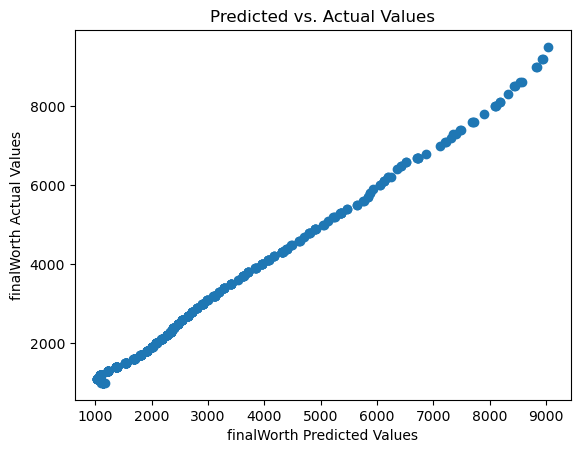

In [158]:
import matplotlib.pyplot as plt

plt.scatter(Lasso_y_predict, y_test)  # y is actual target values
plt.xlabel("finalWorth Predicted Values")
plt.ylabel("finalWorth Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

#### 5.6.2 Graph 2: Lasso Regression top 20 correlated features(sorted in absolute value)

<Axes: >

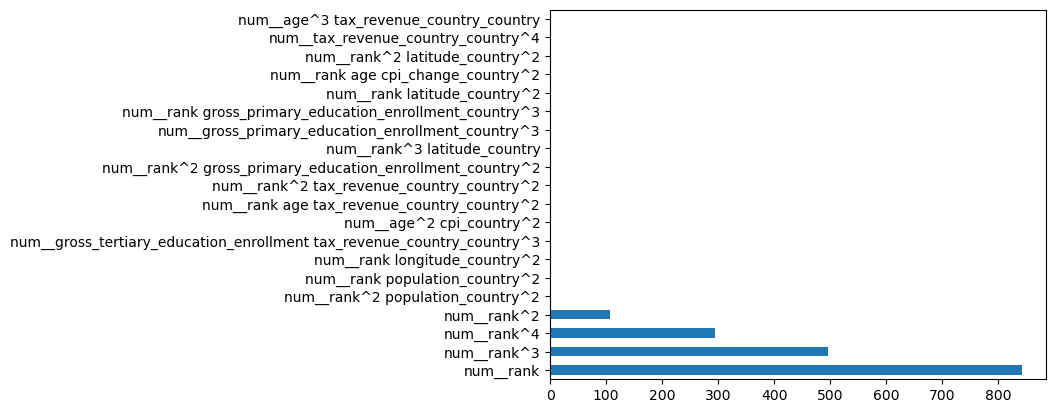

In [166]:
# This code is adapted from online author. See https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression

# Top 20 correlated features sorted in absolute value
pd.Series(lasso_model.coef_, lasso_model.feature_names_in_).abs().sort_values(ascending = False).head(20).plot(kind = "barh")

#### 5.6.3 Graph 3: Lasso Regression plot most correlated feature vs. actual test values

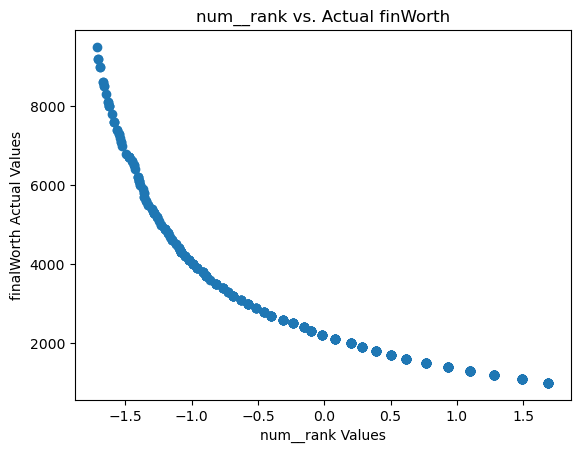

In [168]:
# plot the most correlated feature vs. actual value

plt.scatter(X_test['num__rank'], y_test)  # y_test are actual target values
plt.xlabel("num__rank Values")
plt.ylabel("finalWorth Actual Values")
plt.title("num__rank vs. Actual finWorth")
plt.show()